In [1]:
import pandas as pd

data_file = pd.read_csv('tcc_ceds_music.csv')
data_file.head(5)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [2]:
genre_map = {}
genre_index = 1
for genre in data_file['genre']:
    if genre in genre_map:
        continue
    else:
        genre_map[genre] = genre_index
        genre_index += 1

In [3]:
data_file['genre'] = data_file['genre'].apply(lambda x : genre_map[x])
data_file.head(5)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,1,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,1,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,1,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,1,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,1,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_file['lyrics'], data_file['genre'], test_size=0.2, random_state=42)

In [5]:
bag_of_words = {}
word_index = 0
for train_lyrics in X_train:
    for lyric in train_lyrics.split(' '):
        if lyric in bag_of_words:
            continue
        else:
            bag_of_words[lyric] = word_index
            word_index += 1

In [6]:
import numpy as np

train_bag = np.zeros((len(X_train), len(bag_of_words.keys())))
test_bag = np.zeros((len(X_test), len(bag_of_words.keys())))

row_num = 0
for train_lyrics in X_train:
    for lyric in train_lyrics.split(' '):
        if lyric in bag_of_words.keys():
            train_bag[row_num, bag_of_words[lyric]] = train_bag[row_num, bag_of_words[lyric]] + 1
    row_num += 1
        
row_num = 0
for test_lyrics in X_test:
    for lyric in test_lyrics.split(' '):
        if lyric in bag_of_words.keys():
            test_bag[row_num, bag_of_words[lyric]] = test_bag[row_num, bag_of_words[lyric]] + 1
    row_num += 1

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_lyrics = KNeighborsClassifier(n_neighbors = 5)
knn_lyrics.fit(train_bag, y_train)
y_predict = knn_lyrics.predict(test_bag)

print(y_predict)
print(y_test)

[6 2 6 ... 4 4 4]
27369    6
26302    6
2325     1
20415    4
10154    2
        ..
898      1
22373    5
1722     1
14276    3
8188     2
Name: genre, Length: 5675, dtype: int64


In [8]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_predict))

0.23118942731277534


In [9]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV

lidstone_smoothing = [0.01, 0.1, 0.5, 1]
parameters = {'alpha':lidstone_smoothing}

naive_bayes_classifier = ComplementNB()
nbgrid = GridSearchCV(naive_bayes_classifier, parameters)
nbgrid.fit(train_bag, y_train)

GridSearchCV(estimator=ComplementNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1]})

In [10]:
print('Parameters:', nbgrid.cv_results_['params'], sep='\n', end='\n\n')
print('Accuracies:', nbgrid.cv_results_['mean_test_score'], sep='\n', end='\n\n')
print('Rankings:', nbgrid.cv_results_['rank_test_score'], sep='\n', end='\n\n')
print('Best Accuracy: ', round(max(nbgrid.cv_results_['mean_test_score'])*100, 2), '%')

Parameters:
[{'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 0.5}, {'alpha': 1}]

Accuracies:
[0.35577421 0.36255925 0.36758195 0.36996103]

Rankings:
[4 3 2 1]

Best Accuracy:  37.0 %


In [11]:
nb_predictions = nbgrid.predict(test_bag)
print(accuracy_score(y_test, nb_predictions))

0.3763876651982379


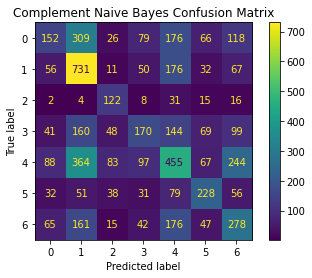

In [23]:
import matplotlib.pyplot as plt
from sklearn import metrics

reverse_genre_map = {v: k for k, v in genre_map.items()}
y_test_genres = [reverse_genre_map[v] for v in y_test]
nb_predictions_genres = [reverse_genre_map[v] for v in nb_predictions]

conf_matrix = metrics.confusion_matrix(y_test_genres, nb_predictions_genres)
disp = metrics.ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.title('Complement Naive Bayes Confusion Matrix')
plt.show()

In [21]:
print(genre_map)

{'pop': 1, 'country': 2, 'blues': 3, 'jazz': 4, 'reggae': 5, 'rock': 6, 'hip hop': 7}


In [24]:
sample_lyrics = 'blue jeans tractor tractor love my girl'

sample_bag = np.zeros((1, len(bag_of_words.keys())))
for lyric in train_lyrics.split(' '):
        if lyric in bag_of_words.keys():
            train_bag[0, bag_of_words[lyric]] = train_bag[0, bag_of_words[lyric]] + 1
            
sample_prediction = nbgrid.predict(sample_bag)
print(reverse_genre_map[sample_prediction[0]])

pop


In [22]:
#A lot of this either doesn't work or only gets about ~25% accuracy 

import tensorflow as tf

model = tf.keras.Sequential()

In [13]:
model.add(tf.keras.Input(shape=(train_bag.shape[1],)))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(7, activation='softmax'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='sgd', metrics=['accuracy'])

In [14]:
model.fit(train_bag, y_train, epochs=50)

Epoch 1/50
710/710 [==============================] - 12s 17ms/step - loss: 3.7887e-07 - accuracy: 0.0000e+000s - loss: 3.787
Epoch 2/50
710/710 [==============================] - 13s 19ms/step - loss: 3.7887e-07 - accuracy: 0.0000e+00
Epoch 3/50
710/710 [==============================] - 12s 17ms/step - loss: 3.7887e-07 - accuracy: 0.0000e+00
Epoch 4/50
710/710 [==============================] - 12s 17ms/step - loss: 3.7887e-07 - accuracy: 0.0000e+00
Epoch 5/50
710/710 [==============================] - 12s 17ms/step - loss: 3.7887e-07 - accuracy: 0.0000e+00
Epoch 6/50
710/710 [==============================] - 12s 17ms/step - loss: 3.7887e-07 - accuracy: 0.0000e+00
Epoch 7/50
710/710 [==============================] - 13s 18ms/step - loss: 3.7887e-07 - accuracy: 0.0000e+00
Epoch 8/50
710/710 [==============================] - 12s 17ms/step - loss: 3.7887e-07 - accuracy: 0.0000e+00
Epoch 9/50
710/710 [==============================] - 13s 18ms/step - loss: 3.7887e-07 - accuracy: 0.000

In [15]:
ann_predict = model.predict(test_bag)
ann_predict = np.round(ann_predict)
print(accuracy_score(y_test, ann_predict))

0.0
